# Business cycle analysis

In [1]:
from utils import *

## Load the data

In [3]:
raw_data = pd.read_csv("fred_md.csv").iloc[2:, :]
population = pd.read_csv("population.csv")
interest = pd.read_csv("interest_rate.csv")

raw_data["sasdate"] = pd.to_datetime(raw_data["sasdate"], format="%m/%d/%Y")
population["sasdate"] = pd.to_datetime(population["DATE"], format="%Y/%m/%d") + pd.DateOffset(months=2)
interest["sasdate"] = pd.to_datetime(interest["DATE"], format="%Y/%m/%d") + pd.DateOffset(months=2)

raw_data.index = raw_data["sasdate"]
raw_data = raw_data.drop(columns=["sasdate"])
population.index = population["sasdate"]
population = population.drop(columns=["sasdate", "DATE"])
interest.index = interest["sasdate"]
interest = interest.drop(columns=["sasdate", "DATE"])

raw_data = raw_data.join(population).join(interest)
raw_data.head()

,GDPC1,PCECC96,PCDGx,PCESVx,PCNDx,GPDIC1,FPIx,Y033RC1Q027SBEAx,PNFIx,PRFIx,A014RE1Q156NBEA,GCEC1,A823RL1Q225SBEA,FGRECPTx,SLCEx,EXPGSC1,IMPGSC1,DPIC96,OUTNFB,OUTBS,OUTMS,INDPRO,IPFINAL,IPCONGD,IPMAT,IPDMAT,IPNMAT,IPDCONGD,IPB51110SQ,IPNCONGD,IPBUSEQ,IPB51220SQ,TCU,CUMFNS,PAYEMS,USPRIV,MANEMP,SRVPRD,USGOOD,DMANEMP,NDMANEMP,USCONS,USEHS,USFIRE,USINFO,USPBS,USLAH,USSERV,USMINE,USTPU,USGOVT,USTRADE,USWTRADE,CES9091000001,CES9092000001,CES9093000001,CE16OV,CIVPART,UNRATE,UNRATESTx,UNRATELTx,LNS14000012,LNS14000025,LNS14000026,UEMPLT5,UEMP5TO14,UEMP15T26,UEMP27OV,LNS13023621,LNS13023557,LNS13023705,LNS13023569,LNS12032194,HOABS,HOAMS,HOANBS,AWHMAN,AWHNONAG,AWOTMAN,HWIx,HOUST,HOUST5F,PERMIT,HOUSTMW,HOUSTNE,HOUSTS,HOUSTW,CMRMTSPLx,RSAFSx,AMDMNOx,ACOGNOx,AMDMUOx,ANDENOx,INVCQRMTSPL,PCECTPI,PCEPILFE,GDPCTPI,GPDICTPI,IPDBS,DGDSRG3Q086SBEA,DDURRG3Q086SBEA,DSERRG3Q086SBEA,DNDGRG3Q086SBEA,DHCERG3Q086SBEA,DMOTRG3Q086SBEA,DFDHRG3Q086SBEA,DREQRG3Q086SBEA,DODGRG3Q086SBEA,DFXARG3Q086SBEA,DCLORG3Q086SBEA,DGOERG3Q086SBEA,DONGRG3Q086SBEA,DHUTRG3Q086SBEA,DHLCRG3Q086SBEA,DTRSRG3Q086SBEA,DRCARG3Q086SBEA,DFSARG3Q086SBEA,DIFSRG3Q086SBEA,DOTSRG3Q086SBEA,CPIAUCSL,CPILFESL,WPSFD49207,PPIACO,WPSFD49502,WPSFD4111,PPIIDC,WPSID61,WPU0531,WPU0561,OILPRICEx,AHETPIx,CES2000000008x,CES3000000008x,COMPRMS,COMPRNFB,RCPHBS,OPHMFG,OPHNFB,OPHPBS,ULCBS,ULCMFG,ULCNFB,UNLPNBS,FEDFUNDS,TB3MS,TB6MS,GS1,GS10,MORTGAGE30US,AAA,BAA,BAA10YM,MORTG10YRx,TB6M3Mx,GS1TB3Mx,GS10TB3Mx,CPF3MTB3Mx,BOGMBASEREALx,M1REAL,M2REAL,BUSLOANSx,CONSUMERx,NONREVSLx,REALLNx,REVOLSLx,TOTALSLx,DRIWCIL,TABSHNOx,TLBSHNOx,LIABPIx,TNWBSHNOx,NWPIx,TARESAx,HNOREMQ027Sx,TFAABSHNOx,VIXCLSx,USSTHPI,SPCS10RSA,SPCS20RSA,TWEXAFEGSMTHx,EXUSEU,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,UMCSENTx,USEPUINDXM,B020RE1Q156NBEA,B021RE1Q156NBEA,GFDEGDQ188S,GFDEBTNx,IPMANSICS,IPB51222S,IPFUELS,UEMPMEAN,CES0600000007,TOTRESNS,NONBORRES,GS5,TB3SMFFM,T5YFFM,AAAFFM,WPSID62,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,CES0600000008,DTCOLNVHFNM,DTCTHFNM,INVEST,HWIURATIOx,CLAIMSx,BUSINVx,ISRATIOx,CONSPIx,CP3M,COMPAPFF,PERMITNE,PERMITMW,PERMITS,PERMITW,NIKKEI225,NASDAQCOM,CUSR0000SEHC,TLBSNNCBx,TLBSNNCBBDIx,TTAABSNNCBx,TNWMVBSNNCBx,TNWMVBSNNCBBDIx,TLBSNNBx,TLBSNNBBDIx,TABSNNBx,TNWBSNNBx,TNWBSNNBBDIx,CNCFx,S&P 500,S&P: indust,S&P div yield,S&P PE ratio,POPTHM,DFF
sasdate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1959-03-01,3123.978,1927.430,76.627,1231.717,708.599,340.604,340.505,49.278,169.880,229.223,0.800,1067.197,-7.700,518.215,491.277,93.393,129.446,2200.072,16.700,16.905,NaN,22.361,22.434,31.856,20.641,12.528,31.173,19.206,17.815,38.332,8.145,22.916,NaN,81.372,52726.667,44609.000,15124.000,33808.333,18918.333,8848.000,6276.000,2995.333,2777.333,2422.667,1704.333,3556.333,3319.333,1089.667,799.000,10821.000,8117.667,5387.733,2576.167,2337.000,1472.667,4308.000,63939.667,59.200,5.833,4.724,1.087,13.500,5.133,5.600,1529.000,1142.000,556.333,738.000,NaN,NaN,NaN,NaN,2703.333,55.272,NaN,51.055,40.300,NaN,2.633,1434.000,1648.000,345.667,NaN,444.667,342.000,505.333,356.000,292979.719,18376.131,91524.786,NaN,261588.027,NaN,NaN,16.056,16.703,16.316,24.235,19.610,26.335,56.963,11.344,17.792,10.747,30.033,49.329,265.357,29.561,16.446,50.792,6.842,16.142,13.155,5.768,12.617,13.756,10.520,12.440,11.271,28.993,29.933,33.167,31.700,33.367,35.233,30.400,30.667,NaN,81.225,17.901,NaN,14.688,12.293,NaN,51.713,49.601,NaN,32.710,30.585,22.430,NaN,21.866,15.765,2.570,2.773,3.117,3.503,3.990,NaN,4.130,4.870,0.880,NaN,0.340,0.730,1.220,0.530,172452.942,480.567,992.767,210.672,125.523,296.323,150.819,NaN,296.323,NaN,12740.470,1117.428,50.791,11623.040,528.303,9784.847,2955624.740,8703.900,NaN,NaN,NaN,NaN,NaN,NaN,4.316,359.842,2.809,0.971,NaN,NaN,4.300,4.200,NaN,NaN,21.204,19.926,34.639,15.700,39.833,

## Data preprocessing

In [44]:
data = raw_data[list(features_to_names.keys())].copy().iloc[:-1, :]
data = data.rename(columns=features_to_names).fillna(0)

data["population"] = data["population"].astype(float)
data["interest_rate"] = data["interest_rate"].astype(float)

milliard_factor_cols = ["gdp", "non_durable_consumption", "durable_consumption", "investment"]
thousand_factor_cols = ["employment", "population"]
for c in milliard_factor_cols:
    data[c] = data[c] * 1000_000_000
for c in thousand_factor_cols:
    data[c] = data[c] * 1000

data["gdp_cap"] = data["gdp"] / data["population"]
data["consumption_cap"] = (data["non_durable_consumption"] + data["durable_consumption"]) / data["population"]
data["investment_cap"] = data["investment"] / data["population"]
data["all_hours"] = data["all_bus_hours"] + data["all_manuf_hours"] + data["all_nonfarm_hours"]
data["productivity"] = data["gdp"] / data["employment"]
data.head()

,gdp,non_durable_consumption,durable_consumption,investment,all_bus_hours,all_manuf_hours,all_nonfarm_hours,avg_hours,avg_private_hours,average_hourly_earnings,employment,population,interest_rate,gdp_cap,consumption_cap,investment_cap,all_hours,productivity
sasdate,,,,,,,,,,,,,,,,,,
1959-03-01,3123978000000.000,708599400000.000,76626900000.000,340604000000.000,55.272,0.000,51.055,40.300,0.000,0.000,63939666.700,176045333.333,2.577,17745.304,4460.364,1934.752,106.327,48858.215
1959-06-01,3194429000000.000,714457500000.000,79510700000.000,367099000000.000,56.567,0.000,52.021,40.600,0.000,0.000,64772000.000,176726666.667,3.080,18075.535,4492.634,2077.213,108.588,49318.054
1959-09-01,3196683000000.000,717215900000.000,81048100000.000,343391000000.000,56.048,0.000,51.868,40.367,0.000,0.000,64875000.000,177480666.667,3.573,18011.443,4497.752,1934.808,107.916,49274.497
1959-12-01,3205790000000.000,721633200000.000,77176000000.000,354567000000.000,56.005,0.000,51.883,40.100,0.000,0.000,64927333.300,178267666.667,3.992,17983.014,4480.954,1988.959,107.888,49375.045
1960-03-01,3277847000000.000,723444000000.000,79659000000.000,390210000000.000,55.868,0.000,52.208,40.300,0.000,0.000,65213333.300,179319333.333,3.931,18279.384,4478.619,2176.062,108.076,50263.448


## Table 1

In [5]:
table1_raw_features = ["gdp", "non_durable_consumption", "durable_consumption", 
                   "all_hours", "avg_hours", 
                   "employment", "productivity", "average_hourly_earnings"]
table1_features = [f"{c}_trans" for c in table1_raw_features]

In [6]:
for c, c_trans in zip(table1_raw_features, table1_features):
    data[c_trans] = feat_to_transform[c](1 + data[c])

if np.isnan(data[table1_features[0]][0]):
    data = data.iloc[1:, :]

In [7]:
table1_std = data[table1_features].std() * 100

table1_data = []
for c in table1_features:
    table1_data.append(np.concatenate([ccf(data["gdp_trans"], data[c])[1:5][::-1],
                   ccf(data[c], data["gdp_trans"])[:5]]))

In [8]:
table1 = pd.DataFrame(table1_data)
table1.columns = ["t-4", "t-3", "t-2", "t-1", "t", "t+1", "t+2", "t+3", "t+4"]
table1["variable"] = table1_std.index
table1["sd%"] = table1_std.values
table1

,t-4,t-3,t-2,t-1,t,t+1,t+2,t+3,t+4,variable,sd%
0,0.173,0.366,0.577,0.772,1.000,0.772,0.577,0.366,0.173,gdp_trans,1.544
1,0.288,0.442,0.590,0.657,0.742,0.535,0.387,0.176,-0.016,non_durable_consumption_trans,1.253
2,0.429,0.548,0.657,0.735,0.722,0.465,0.288,0.075,-0.078,durable_consumption_trans,4.263
3,0.019,0.033,0.044,0.055,0.060,0.037,0.026,0.022,-0.022,all_hours_trans,28.293
4,0.339,0.484,0.605,0.682,0.762,0.461,0.162,-0.073,-0.254,avg_hours_trans,0.896
5,-0.047,0.091,0.262,0.454,0.777,0.715,0.609,0.516,0.398,employment_trans,1.348
6,0.336,0.449,0.547,0.589,0.505,0.232,0.072,-0.132,-0.273,productivity_trans,0.984
7,0.129,0.094,0.096,0.096,0.094,0.072,0.069,0.038,0.012,average_hourly_earnings_trans,17.020


### Verify whether or not the following business cycle facts from Cooley and Prescott (1995) still hold today

- **Consumption is smoother than output**. Based on the table we see that the consumption is still smoother that output because the percentage standard deviation is lower.

- **Volatility in GNP is similar in magnitude to volatility in total hours** Volatility of GNP is less than the lovatility of total hours.

In [10]:
print("%.2f std of GDP" % data["gdp_trans"].std())
print("%.2f std of total hours" % data["all_hours_trans"].std())

0.02 std of GDP
0.28 std of total hours


- **Volatility in employment is greater than volatility in average hours. Therefore most labour market adjustments operate on the extensive rather than intensive margin.** Volatility of employment is a bit higher than volatility of average hours, so market adjustments operate on the extensive margin.

In [12]:
print("%.3f std of employment" % data["employment_trans"].std())
print("%.3f std of average hours" % data["avg_hours_trans"].std())

0.013 std of employment
0.009 std of average hours


- **Productivity is slightly pro-cyclical.** Productivity is slightly pro-cyclical, that is true.

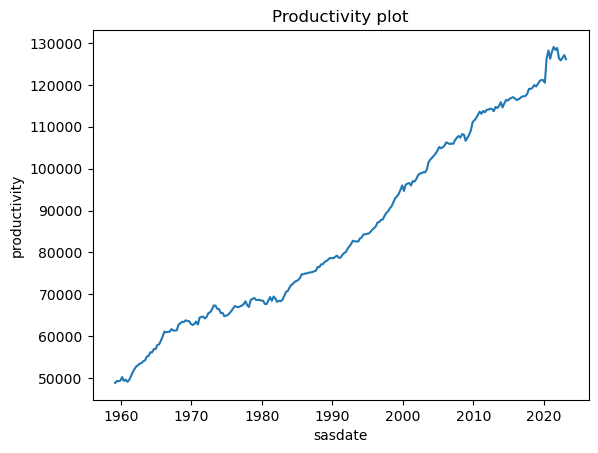

In [16]:
sns.lineplot(x=data.index, y=data['productivity'])
plt.title("Productivity plot");

- **Wages are less variable than productivity.** No, it is vice versa, wages are more variable than the productivity.

In [19]:
print("%.3f std of wages" % data["average_hourly_earnings_trans"].std())
print("%.3f std of productivity" % data["productivity_trans"].std())

0.170 std of wages
0.010 std of productivity


- **There is no correlation between wages and output (nor with employment for that matter).**. Well, actually there exists a correlation between wages and output and it is quite strong.

In [28]:
print("%.3f Pearson correlation between wages and output" % np.corrcoef(x=data["average_hourly_earnings"], y=data["gdp"])[0][1])

0.692 Pearson correlation between wages and output


## Table 2

In [20]:
table2_raw_features = ["gdp_cap", "consumption_cap", 
                   "investment_cap", "avg_hours", 
                   "average_hourly_earnings", "interest_rate"]
table2_features = [f"{c}_trans" for c in table2_raw_features]

In [21]:
for c, c_trans in zip(table2_raw_features, table2_features):
    data[c_trans] = feat_to_transform[c](1 + data[c])

if np.isnan(data[table2_features[0]][0]):
    data = data.iloc[1:, :]

In [22]:
table2 = {}
table2["std_abs"] = data[table2_features].std().values
table2["std_rel"] = table2["std_abs"] / table2["std_abs"][0]

autocorr = []
for c in table2_features:
    autocorr.append(ccf(data[c], data[c])[1])
table2["autocorr"] = autocorr

corr = []
for c in table2_features:
    corr.append(ccf(data["gdp_cap_trans"], data[c])[0])
table2["corr"] = corr

table2 = pd.DataFrame(table2)
table2.index = table2_features
table2

,std_abs,std_rel,autocorr,corr
gdp_cap_trans,0.016,1.000,0.775,1.000
consumption_cap_trans,0.018,1.145,0.793,0.744
investment_cap_trans,0.065,4.137,0.805,0.879
avg_hours_trans,0.009,0.574,0.715,0.761
average_hourly_earnings_trans,0.170,10.901,0.727,0.096
interest_rate_trans,3.652,233.902,0.974,0.181


### Verify whether or not the following business cycle facts from King and Rebelo (1999) still hold today:

- **Consumption of non-durables is less volatile than output.** Consumption of non-durables is slightly less volatile than output.

In [32]:
print("%.3f std of non-durables" % data["non_durable_consumption_trans"].std())
print("%.3f std of output" % data["gdp_trans"].std())

0.013 std of non-durables
0.015 std of output


- **Consumer durables are more volatile than output**. That is true still nowadays, consumer durables are in fact more volatile than output.

In [33]:
print("%.3f std of durables" % data["durable_consumption_trans"].std())
print("%.3f std of output" % data["gdp_trans"].std())

0.043 std of durables
0.015 std of output


- **Investment is three times more volatile than output.** Based on the table below `std_abs` of investment is 0.065 which is almost three times more volatile than `std_abs` of the output 0.016.
- **Government expenditures are less volatile than output.** Unfortunately I didn't find data about the government expenditures.

- **Total hours worked are about the same volatility as output.** No, it is not true nowadays. STD of the total hours worked is much higher than the std of the output.

In [35]:
print("%.3f std of total hours worked" % data["all_hours_trans"].std())
print("%.3f std of output" % data["gdp_trans"].std())

0.283 std of total hours worked
0.015 std of output


- **Capital is much less volatile than output.** Unfortunately I didn't find data about the capital.

- **Employment is as volatile as output, while hours per worker are much less volatile than output.**  - Based on the observations below that still holds nowadays.

In [39]:
print("%.3f std of employment" % data["employment_trans"].std())
print("%.3f std of output" % data["gdp_trans"].std())

print()
print("%.3f std of hours per worker" % data["avg_hours_trans"].std())
print("%.3f std of output" % data["gdp_trans"].std())

0.013 std of employment
0.015 std of output

0.009 std of hours per worker
0.015 std of output


- **Labour productivity is less volatile than output** - Right!

In [40]:
print("%.3f std of productivity" % data["productivity_trans"].std())
print("%.3f std of output" % data["gdp_trans"].std())

0.010 std of productivity
0.015 std of output


- **The real wage is much less volatile than output.** No, it is actually vice versa - wages are much more volatile than output.

In [43]:
print("%.3f std of wages" % data["average_hourly_earnings_trans"].std())
print("%.3f std of output" % data["gdp_trans"].std())

0.170 std of wages
0.015 std of output
